In [1]:
from datetime import datetime

In [2]:
datetime.fromtimestamp(1614758400000.0/1000).strftime('%Y-%m-%d')

'2021-03-03'

In [3]:
import pandas as pd
import re

In [4]:
path = '../中信证券/keywords/test.xlsx'

In [49]:
data = pd.read_excel(path)
# # 去除空行
# data = data.dropna()
# title = data['title'].tolist()
# content = data['content'].tolist()
# label = data['label'].tolist()

In [50]:
data

,Unnamed: 0,_id,num,报告标题,发布日期,相关股票,行业类型,作者2,报告类别,CONTENT,短摘要,股票评级,行业评级,作者组,n_list,nz_list,PER_list,LOC_list,ORG_list
0,0,606c13314b6dc7ffa5fb88a0,350,晨会20210326,2021-03-26 07:53:28,NaN,晨会,汪蓉,晨会,重点推荐\r\n\r\n▍债市启明系列20210326—如何看待昨日鲍威尔释放鹰派信号？\r...,0,NaN,NaN,编辑,"['系列', '鹰派', '信号', '\r\nFICC', '主席', '经济', '目标...","['债市启明', '美债收益率', '嘉鱼', 'EPS预测', '建安成本', 'TapT...","['鲍威尔', '福斯特', '金科']","['美国', '达峰', '湖北', '黄冈', '崇阳', '北京首都机场']","['美联储', '上汽自主新周期\r\n汽车｜公司', '中信证券', '3月美股科技股',..."
1,1,606c13324b6dc7ffa5fb88a1,351,债市启明系列20210326—如何看待昨日鲍威尔释放鹰派信号？,2021-03-26 08:02:49,NaN,固定收益,"章立聪,余经纬,明明",总量研究：定期报告,昨日美联储主席鲍威尔表示随着经济复苏和目标取得实质性进展，美联储将减少债券购买。去年8月初开...,1,NaN,NaN,FICC,"['系列', '鹰派', '信号', '主席', '经济', '目标', '实质性', '债...","['债市启明', '美债收益率', '议息会议', 'PMI指数', '美债利率', '中美...",['鲍威尔'],['美国'],"['美联储', '3月份美联储']"
2,2,606c13324b6dc7ffa5fb88a2,352,中煤能源（601898.SH/01898.HK）2020年年报点评：业绩持续恢复，2021年...,2021-03-26 08:32:53,601898.0,煤炭,祖国鹏,公司：公司点评,公司2020年四季度业绩略超预期，全年业绩实现增长。展望未来，公司2021年化工产品或显著贡...,0,NaN,NaN,能源化工,"['/01898.HK', '年报', '业绩', '化工', '板块', '公司', '全...","['Q4', '营业收入/', '同比分别+9.0%/+4.9%', '投资收益', 'H股...",[],"['平朔矿区', '华晋', '依兰']","['中煤能源', '里必煤矿']"
3,3,606c13334b6dc7ffa5fb88a3,353,稳健医疗（300888）调研报告—千亿市值并不遥远：夯实基础，追求卓越,2021-03-26 08:33:53,300888.0,纺织服装,"郑一鸣,冯重光",公司：公司深度,近期我们深入调研了稳健医疗位于湖北的三所工厂（黄冈、崇阳、嘉鱼），在加深对公司工厂的智能制造...,1,买入,NaN,纺织,"['医疗', '调研报告', '市值', '基础', '工厂', '对公司', '智能', ...","['嘉鱼', 'EPS预测', '全棉水刺无纺布', 'A股', 'DTC']",[],"['湖北', '黄冈', '崇阳', '武汉', '嘉鱼稳健科技产业园']","['黄冈工厂', '崇阳工厂', '嘉鱼工厂']"
4,4,606c13344b6dc7ffa5fb88a4,1,新城控股（601155.SH）2020年年报点评——努力构建稳健的盈利模型,2021-03-30 11:08:08,601155.0,房地产,"张全国,陈聪,李金哲",公司：公司点评,公司力图增加经营性收入，以较低的净负债率降低融资成本，并构建更加稳健的盈利模型。不过公司绝对...,0,NaN,NaN,房地产,"['年报', '模型', '公司', '经营性', '收入', '成本', '规模', '商...","['净负债率', '同比+', '毛利率', '经营性收入', '占比', '资产负债率',...",[],[],['新城控股']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,372,606c14164b6dc7ffa5fb8a14,370,CITICS_FICC China Weekly Review 20210329,2021-03-29 15:54:59,NaN,FICC,明明,总量研究：定期报告,"Last week, the weighted average interbank pled...",0,NaN,NaN,FICC,"['CITICS', 'FICC China', 'interbank pledged re...","['Weekly Review', 'weighted average', 'and', '...",[],[],"['Treasury bonds due to maturity fell', 'yield..."
373,373,606c14164b6dc7ffa5fb8a15,371,CITICS_China Policy Hotspots Weekly Review 202...,2021-03-29 16:13:52,NaN,FICC,明明,总量研究：定期报告,Keywords:\r\n\r\nChina to boost manufacturing ...,0,NaN,NaN,FICC,"['CITICS', 'Hotspots', 'Takeaway', 'Keywords',...","['China Policy', 'Weekly Review', 'Promote Con...",[],[],['the provisions on the procedures for the imp...
374,374,606c14174b6dc7ffa5fb8a16,372,碧桂园（02007.HK）2020年业绩点评——组织裂变推动回款和利润率双拐点,2021-03-26 11:17:54,2007.0,房地产,"张全国,陈聪,李金哲",公司：公司点评,公司实施组织裂变，创造出接地气且规模化平台共享的全新管控体系。依托于此，公司实现多小盘同开，...,1,NaN,NaN,房地产,"['业绩', '回款', '利润率', '双拐点', '公司', '组织', '出接地气',...","['建安成本', '同行简', '毛利率', '建安', '建安失准则', '期末净负债率'...",[],['中国'],['碧桂园']
375,375,606c14174b6dc7ffa5fb8a17,373,中信证券每周盈利预测报告20210326,2021-03-26 16:41:16,NaN,盈利预测,研究部,行业：定期报告,NaN,0,NaN,NaN,研究部,['报告'],['nan'],[],[],['中信证券']


In [51]:
data['行业类型'].unique()

array(['晨会', '固定收益', '煤炭', '纺织服装', '房地产', '交通运输', '建材', '电子', '盈利预测',
       '石油石化', 'Transportation', 'Auto & Parts', 'Data Technology',
       'Real Estate', 'NEV', '投资策略', '社会服务', '汽车', '化工', '新能源汽车',
       '电力设备及新能源', '有色金属', '医药', '前瞻研究', '银行', '公用环保', '新材料',
       'Morning Notes', '宏观经济', 'Strategy', '食品饮料', '军工', '计算机', '非银行金融',
       'Textile & Apparel', 'FICC', '建筑', '数据科技', 'Defense',
       'Innovative Technology', '家电', 'Non-Bank Financial', '传媒', '轻工制造',
       'Nonferrous Metals', '通信', 'Macro Economy', 'Computer', '量化与配置',
       'Banking', 'Media & Internet', 'Food & Beverage', '定期报告', '金融产品',
       'Energy & Chemical', 'Policy', '研究报告', '农林牧渔', '商业零售', 'Coal',
       'Electronics', 'Home Appliances', 'Social services'], dtype=object)

In [52]:
data[(data['报告类别'].str.contains('行业')) & ~(data['报告类别'].str.contains('英文'))]

,Unnamed: 0,_id,num,报告标题,发布日期,相关股票,行业类型,作者2,报告类别,CONTENT,短摘要,股票评级,行业评级,作者组,n_list,nz_list,PER_list,LOC_list,ORG_list
7,7,606c13354b6dc7ffa5fb88a7,4,建材行业周观点（2021年3月22日-2021年3月28日）—华东熟料价格已超去年最高水平，...,2021-03-29 15:13:38,NaN,建材,"张若海,孙明新",行业：定期报告,随着下游需求恢复速度加快，全国水泥价格逐步出现普涨行情，其中3月26日，长三角沿江地区熟料又...,0,NaN,NaN,"建材,数据科技","['建材', '行业', '周观点', '熟料', '价格', '水平', '玻璃', '库...","['帝欧', '伟星新材', '蒙娜丽莎']",[],"['华东', '长三角', '中国']","['信义玻璃', '旗滨集团', '中国巨石', '长海股份', '中材科技', '北京利尔..."
9,9,606c13364b6dc7ffa5fb88a9,6,中信证券每周盈利预测报告20210402,2021-04-02 16:19:14,NaN,盈利预测,研究部,行业：定期报告,NaN,0,NaN,NaN,研究部,['报告'],['nan'],[],[],['中信证券']
29,29,606c13434b6dc7ffa5fb88bd,26,光伏行业观察20210331—光玻降价加快价格新平衡点到来，积极因素积累助推需求边际改善,2021-03-31 09:38:42,NaN,电力设备及新能源,"华鹏伟,林劼",行业：行业点评,目前3.2mm光伏玻璃的价格最低已下探至28元/平米，环比下降超过25%，降幅超市场预期，相...,1,NaN,NaN,电力设备,"['光伏', '行业', '光玻', '价格', '平衡点', '因素', '需求', '边...","['光伏组件', '产业链协同', 'IRR', '毛利率', '光伏电站', '硅料检修'...","['福斯特', '福莱特']",[],"['隆基股份', '通威股份']"
32,32,606c13454b6dc7ffa5fb88c0,29,智能电动汽车专题报告—智能电动汽车2025谁将胜出？,2021-03-31 10:07:34,NaN,前瞻研究,"许英博,尹欣驰,宋韶灵,黄亚元,李景涛,丁奇",行业：行业专题和深度,智能电动汽车将成汽车产品竞争主战场，更是下一代移动互联网AIoT 最重要的产品平台。基于保守...,1,无评级,NaN,"计算机,汽车及零部件,前瞻研究,新能源汽车","['智能', '汽车', '产品', '主战场', '下一代', '互联网', 'AIoT'...","['特斯拉', '自动驾驶算法。1', '算法。4', '特斯拉FSD', 'Full', ...","['特斯拉', '小鹏']","['中国', '宁德', '长城']","['小米', '路透社', '苹果', '苹果智能汽车', '华为', '百度', '吉利'..."
66,66,606c135e4b6dc7ffa5fb88e2,63,数据超融合系列—汽车电子专题：“众”装上阵、智能提速,2021-03-31 17:47:52,NaN,数据科技,"徐涛,张若海,尹欣驰",行业：行业专题和深度,在国内Z世代未来5年近4000万辆潜在消费增量预期和传统大厂加速allin单车感知智能化的趋...,1,NaN,NaN,"电子,汽车及零部件,数据科技","['汽车', '电子', '专题', '众', '智能', 'Z世代', '增量', '大厂...","['数据超融合系列', '毫米波雷达', '电动化+', 'IC', '易车网', '车载摄...",[],[],"['ABB', '比亚迪', '哈弗车厂']"
72,72,606c13614b6dc7ffa5fb88e8,69,军工板块回调点评—行业进入逻辑切换期，短期波动加剧,2021-03-31 18:49:17,NaN,军工,"付宸硕,陈卓",行业：行业点评,3月31日军工板块调整较多，我们认为主要原因是行业龙头航发动力2020年业绩低于预期，市场质...,1,NaN,NaN,军工,"['军工', '板块', '行业', '短期', '日军工', '原因', '龙头', '航...","['逻辑切换期', '同比+', '毛利率', '关联采购', '估值收缩', '多空博弈'...",[],['洪都'],"['中航工业集团', '中航沈飞', '中直股份', '中航光电', '中航高科子公司', ..."
73,73,606c13624b6dc7ffa5fb88e9,70,后疫情时代 OTC 产业投资机会—结构性调整持续，政策共振驱动长期成长,2021-03-31 19:33:14,NaN,医药,陈竹,行业：行业专题和深度,目录\r\n\r\n1. OTC行业概览\r\n\r\n2. OTC中药领域低谷已过，否极泰...,0,NaN,NaN,医疗健康,"['疫情', '时代', '产业', '机会', '结构性', '政策', '长期', '中...",['OTC'],[],[],[]
76,76,606c13634b6dc7ffa5fb88ec,73,化工行业重大事项点评：“两化合并”——打造科技驱动的创新型企业和世界一流的综合性化工企业,2021-03-31 21:46:37,NaN,化工,"盛夏,王喆,袁健聪,陈渤阳",行业：行业专题和深度,两化合并后，各板块协同优势将推动旗下上市公司资产形成更加完善的产业链资源共享和技术、销售优势...,0,NaN,强于大市,"能源化工,农林牧渔,新材料组","['化工', '行业', '事项', '科技', '企业', '世界', '综合性', '板...","['两化合并', '两化', '农业投入品', '基础化学品', '\r\n1', '\r\...","['安道麦A', '安迪苏', '克劳斯']","['鲁西', '中国', '沧州']","['两大集团公司', '中化化肥', '沧州大化', '沈阳化工', '风神股份', 'El..."
109,109,606c137b4b6dc7ffa5fb890d,106,CITICS_Data Vision Hyperconverged Data Series ...,2021-04-01 15:10:48,NaN,Auto & Parts,"徐涛,张若海,尹欣驰",行业：行业专题和深度,Core views: In anticipation of potential deman...,0,NaN,NaN,"电子,汽车及零部件,数据科技","['CITICS', 'Takeaway', 'Auto', 'Electronics', ...","['Data', 'Vision', 'Core', 'views', 'nearly', ...",[],[],"['Hyperconverged Data Series', 'Automakers acc..."
124,124,606c13844b6dc7ffa5fb891c,121,电子行业北上资金月报（2021年03月01日-2021年03月31日）,2021-04-02 08:22:33,NaN,电子,"徐涛,张若海",行业：定期报告,个股解析：\r\n资金流量：3月电子行业北上资金个股净流入主力为歌尔股份、韦尔股份、澜起科技...,0,NaN,NaN,"电子,数据科技","['电子', '行业', '资金', '月报', '个股', '\r\n', '流量', '...","['资金个股净流入', '通富微电', '领益智造', 'A股', '沪深300指数']",[],[],"['歌尔股份', '韦尔股份', '沪电股份', '海康威视', '大族激光/顺络电子/锐科..."


### 科技

In [31]:
tech = ['电子', '传媒', '前瞻研究', '计算机', '通信']

In [32]:
nz_list = data[data['行业类型'].isin(tech)]['nz_list']

In [33]:
norm_list = []
for s in nz_list:
    tmp = s[1:-1].split(', ')
    for t in tmp:
        norm_list.append(t[1:-1])

In [34]:
len(norm_list)

802

In [35]:
delete_word_file = '../中信证券/keywords/删除标示.txt'
fb_word_file = '../中信证券/keywords/首尾字符.txt'

def read_txt(file_name):
    word_list = []
    with open(file_name, 'r') as f:
        word_list = [line.replace('\n','') for line in f]
    return word_list

def preprocess(raw_word_list):
    word_list = []
    # tmp_list = []
    delete_word_list = read_txt(delete_word_file)
    fb_word_list = read_txt(fb_word_file)
    # print(fb_word_list)
    
    # 关键字拆分：/  \▍
    for raw_word in raw_word_list:
        tmp_list = re.split('[/ \\\▍]', raw_word)
        for word in tmp_list:
            word_list.append(word)
    raw_word_list = word_list
    word_list = []
    # print(raw_word_list)
    
    # 去掉首尾非法字符
    for raw_word in raw_word_list:
        for fb_word in fb_word_list:
            raw_word = raw_word.strip(fb_word)
        word_list.append(raw_word)
    raw_word_list = word_list
    word_list = []
    # print(raw_word_list)
    
    # 删除日期、数字
    for raw_word in raw_word_list:
        flag = True
        for c in raw_word:
            if (c >= '0' and c <= '9') or c == '-' or c == '/' or c == '.' or c == '%':
                continue
            flag = False
            break
        if flag == False:
            word_list.append(raw_word)
    raw_word_list = word_list
    word_list = []  
    
    # 根据标识词，删除无效关键字
    for raw_word in raw_word_list:
        flag = True
        for delete_word in delete_word_list:
            if delete_word in raw_word or len(raw_word) <= 1:
                flag = False
                break
        if flag:
            word_list.append(raw_word)
    return word_list

In [214]:
len(preprocess(norm_list))

['。1', '。2', '。3', '+']


605

In [37]:
with open('../中信证券/keywords/tech_result.txt', 'w') as f:
    for c in preprocess(norm_list):
        f.write(c + '\n')

### 消费

In [13]:
consume = ['纺织服装', '社会服务', '商业零售', '食品饮料', '农林牧渔', '轻工制造']

In [17]:
nz_list = data[data['行业类型'].isin(consume)]['nz_list']

In [18]:
len(nz_list)

34

In [21]:
norm_list = []
for s in nz_list:
    tmp = s[1:-1].split(', ')
    for t in tmp:
        norm_list.append(t[1:-1])

In [22]:
len(norm_list)

356

In [25]:
delete_word_file = '../中信证券/keywords/删除标示.txt'
fb_word_file = '../中信证券/keywords/首尾字符.txt'

def read_txt(file_name):
    word_list = []
    with open(file_name, 'r') as f:
        word_list = [line.replace('\n','') for line in f]
    return word_list

def preprocess(raw_word_list):
    word_list = []
    # tmp_list = []
    delete_word_list = read_txt(delete_word_file)
    fb_word_list = read_txt(fb_word_file)
    # print(fb_word_list)
    
    # 关键字拆分：/  \▍
    for raw_word in raw_word_list:
        tmp_list = re.split('[/ \\\▍]', raw_word)
        for word in tmp_list:
            word_list.append(word)
    raw_word_list = word_list
    word_list = []
    # print(raw_word_list)
    
    # 去掉首尾非法字符
    for raw_word in raw_word_list:
        for fb_word in fb_word_list:
            raw_word = raw_word.strip(fb_word)
        word_list.append(raw_word)
    raw_word_list = word_list
    word_list = []
    # print(raw_word_list)
    
    # 删除日期、数字
    for raw_word in raw_word_list:
        flag = True
        for c in raw_word:
            if (c >= '0' and c <= '9') or c == '-' or c == '/' or c == '.' or c == '%':
                continue
            flag = False
            break
        if flag == False:
            word_list.append(raw_word)
    raw_word_list = word_list
    word_list = []  
    
    # 根据标识词，删除无效关键字
    for raw_word in raw_word_list:
        flag = True
        for delete_word in delete_word_list:
            if delete_word in raw_word or len(raw_word) <= 1:
                flag = False
                break
        if flag:
            word_list.append(raw_word)
    return word_list

In [26]:
with open('../中信证券/keywords/consume_result.txt', 'w') as f:
    for c in preprocess(norm_list):
        f.write(c + '\n')

### 制造

In [42]:
manu = ['军工', '汽车', '电力设备及新能源', '新能源汽车', '家电', '机械']

In [43]:
nz_list = data[data['行业类型'].isin(manu)]['nz_list']

In [44]:
len(nz_list)

36

In [45]:
norm_list = []
for s in nz_list:
    tmp = s[1:-1].split(', ')
    for t in tmp:
        norm_list.append(t[1:-1])

In [46]:
len(norm_list)

409

In [49]:
delete_word_file = '../中信证券/keywords/删除标示.txt'
fb_word_file = '../中信证券/keywords/首尾字符.txt'

def read_txt(file_name):
    word_list = []
    with open(file_name, 'r') as f:
        word_list = [line.replace('\n','') for line in f]
    return word_list

def preprocess(raw_word_list):
    word_list = []
    # tmp_list = []
    delete_word_list = read_txt(delete_word_file)
    fb_word_list = read_txt(fb_word_file)
    # print(fb_word_list)
    
    # 关键字拆分：/  \▍
    for raw_word in raw_word_list:
        tmp_list = re.split('[/ \\\▍]', raw_word)
        for word in tmp_list:
            word_list.append(word)
    raw_word_list = word_list
    word_list = []
    # print(raw_word_list)
    
    # 去掉首尾非法字符
    for raw_word in raw_word_list:
        for fb_word in fb_word_list:
            raw_word = raw_word.strip(fb_word)
        word_list.append(raw_word)
    raw_word_list = word_list
    word_list = []
    # print(raw_word_list)
    
    # 删除日期、数字
    for raw_word in raw_word_list:
        flag = True
        for c in raw_word:
            if (c >= '0' and c <= '9') or c == '-' or c == '/' or c == '.' or c == '%':
                continue
            flag = False
            break
        if flag == False:
            word_list.append(raw_word)
    raw_word_list = word_list
    word_list = []  
    
    # 根据标识词，删除无效关键字
    for raw_word in raw_word_list:
        flag = True
        for delete_word in delete_word_list:
            if delete_word in raw_word or len(raw_word) <= 1:
                flag = False
                break
        if flag:
            word_list.append(raw_word)
    return word_list

In [50]:
with open('../中信证券/keywords/manufacture_result.txt', 'w') as f:
    for c in preprocess(norm_list):
        f.write(c + '\n')

### 医疗健康

## 词频统计

In [129]:
tech = ['电子', '传媒', '前瞻研究', '计算机', '通信']
content = data[data['行业类型'].isin(tech)]['CONTENT']

In [147]:
consume = ['纺织服装', '社会服务', '商业零售', '食品饮料', '农林牧渔', '轻工制造']
content = data[data['行业类型'].isin(consume)]['CONTENT']

In [138]:
manu = ['军工', '汽车', '电力设备及新能源', '新能源汽车', '家电', '机械']
content = data[data['行业类型'].isin(manu)]['CONTENT']

In [149]:
read_file = '../中信证券/keywords/consume_data.txt'
with open(read_file, 'r') as f:
    raw_data_list = [line.replace('\n','') for line in f]
word_list = []
num_list = []
for raw_data in raw_data_list:
    tmp_list = raw_data.split('|')
    word = tmp_list[0]
    num = int(tmp_list[1])
    word_list.append(word)
    num_list.append(num)

In [150]:
output_file = '../中信证券/keywords/consume.xls'
cnt1_list = []
for word in word_list:
    count = 0
    for c in content:
        if word in c:
            count += 1
    cnt1_list.append(count)

cnt2_list = []
for word in word_list:
    count = 0
    for c in content:
        count += c.count(word)
    cnt2_list.append(count)

df_data = {
    '关键词': word_list,
    '研报数': cnt1_list,
    '总次数': cnt2_list
}
df = pd.DataFrame(df_data)
df.to_excel(output_file, index=False)

In [115]:
with open('../中信证券/keywords/manufacture_data.txt', 'w') as f:
    for c in word_list:
        f.write(c + '\n')

### 在不同研报里出现的次数

In [75]:
import matplotlib.pyplot as plt
import matplotlib

In [79]:
plt.rcParams["font.family"] = 'Arial Unicode MS'

In [105]:
len(content)

58

In [97]:
cnt_list2 = []
for word in word_list:
    count = 0
    for c in content:
        if word in c:
            count += 1
    cnt_list2.append(count)

In [98]:
cnt_list2

[16,
 10,
 12,
 22,
 15,
 7,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 3,
 11,
 8,
 21,
 9,
 2,
 1,
 22,
 14,
 7,
 4,
 4,
 4,
 1,
 3,
 12,
 3,
 5,
 2,
 3,
 2,
 2,
 3,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3]

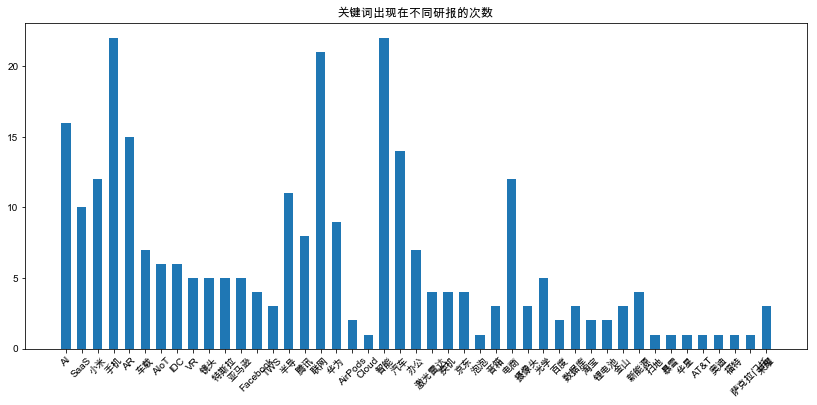

In [108]:
plt.figure(figsize=(14, 6))


bars = plt.bar(word_list, cnt_list2, width=0.6)
#plt.xlabel('识别模型')
# 显示横轴标签
plt.xticks(rotation=45)
# 显示纵轴标签
# 显示图标题
plt.title("关键词出现在不同研报的次数")
plt.show()

### 出现的总次数

In [100]:
cnt_list = []
for word in word_list:
    count = 0
    for c in content:
        count += c.count(word)
    cnt_list.append(count)

In [101]:
cnt_list

[47,
 30,
 88,
 127,
 45,
 27,
 35,
 20,
 11,
 41,
 12,
 10,
 6,
 9,
 47,
 41,
 68,
 40,
 6,
 4,
 120,
 118,
 18,
 8,
 6,
 8,
 7,
 11,
 42,
 4,
 47,
 5,
 58,
 2,
 4,
 4,
 15,
 1,
 1,
 1,
 4,
 2,
 2,
 1,
 11]

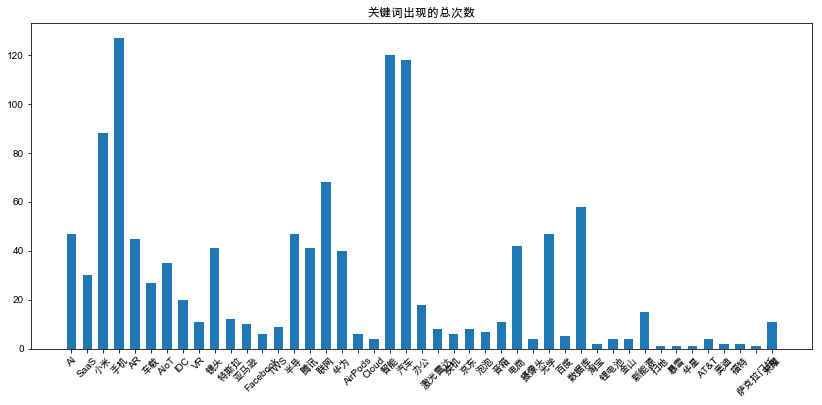

In [110]:
plt.figure(figsize=(14, 6))


bars = plt.bar(word_list, cnt_list, width=0.6)
#plt.xlabel('识别模型')
# 显示横轴标签
plt.xticks(rotation=45)
# 显示纵轴标签
# 显示图标题
plt.title("关键词出现的总次数")
plt.show()

In [116]:
import pandas as pd

In [120]:
data = {
    '关键词': word_list,
    '研报数': cnt_list2,
    '总次数': cnt_list
}

In [121]:
df = pd.DataFrame(data)

In [122]:
df

,关键词,研报数,总次数
0,AI,16,47
1,SaaS,10,30
2,小米,12,88
3,手机,22,127
4,AR,15,45
5,车载,7,27
6,AIoT,6,35
7,IDC,6,20
8,VR,5,11
9,镜头,5,41


### 三级行业关键词匹配

In [8]:
import openpyxl

In [9]:
excel_file = '../中信证券/keywords/分类主题.xlsx'
workbook = openpyxl.load_workbook(excel_file)

### 消费

In [10]:
theme = '消费主题'
worksheet = workbook.get_sheet_by_name(theme)
keyword_list = []
for row in list(worksheet.rows):
    keyword_list.append(row[0].value)

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  


In [11]:
keyword_list

['白酒', '服装', '免税', '旅游', '电子烟', '啤酒', '新零售', '生猪', 'K12', '化妆品']

In [12]:
consume = ['纺织服装', '社会服务', '商业零售', '食品饮料', '农林牧渔', '轻工制造']
content = data[data['行业类型'].isin(consume)]['CONTENT']

In [13]:
cnt1_list = []
for word in keyword_list:
    count = 0
    for c in content:
        if word in c:
            count += 1
    cnt1_list.append(count)

cnt2_list = []
for word in keyword_list:
    count = 0
    for c in content:
        count += c.count(word)
    cnt2_list.append(count)

for i in range(len(keyword_list)):
    worksheet.cell(row = i + 1, column = 2).value = cnt1_list[i]
    worksheet.cell(row = i + 1, column = 3).value = cnt2_list[i]

In [14]:
workbook.save('../中信证券/keywords/分类主题.xlsx') 

### 科技

In [15]:
theme = '科技主题'
worksheet = workbook.get_sheet_by_name(theme)
keyword_list = []
for row in list(worksheet.rows):
    keyword_list.append(row[0].value)

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  


In [16]:
tech = ['电子', '传媒', '前瞻研究', '计算机', '通信']
content = data[data['行业类型'].isin(tech)]['CONTENT']

In [17]:
cnt1_list = []
for word in keyword_list:
    count = 0
    for c in content:
        if word in c:
            count += 1
    cnt1_list.append(count)

cnt2_list = []
for word in keyword_list:
    count = 0
    for c in content:
        count += c.count(word)
    cnt2_list.append(count)

for i in range(len(keyword_list)):
    worksheet.cell(row = i + 1, column = 2).value = cnt1_list[i]
    worksheet.cell(row = i + 1, column = 3).value = cnt2_list[i]

In [18]:
workbook.save('../中信证券/keywords/分类主题.xlsx') 

### 制造

In [19]:
theme = '制造主题'
worksheet = workbook.get_sheet_by_name(theme)
keyword_list = []
for row in list(worksheet.rows):
    keyword_list.append(row[0].value)

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  


In [20]:
manu = ['军工', '汽车', '电力设备及新能源', '新能源汽车', '家电', '机械']
content = data[data['行业类型'].isin(manu)]['CONTENT']

In [21]:
cnt1_list = []
for word in keyword_list:
    count = 0
    for c in content:
        if word in c:
            count += 1
    cnt1_list.append(count)

cnt2_list = []
for word in keyword_list:
    count = 0
    for c in content:
        count += c.count(word)
    cnt2_list.append(count)

for i in range(len(keyword_list)):
    worksheet.cell(row = i + 1, column = 2).value = cnt1_list[i]
    worksheet.cell(row = i + 1, column = 3).value = cnt2_list[i]

In [22]:
workbook.save('../中信证券/keywords/分类主题.xlsx') 

### 医药

In [23]:
theme = '医药主题'
worksheet = workbook.get_sheet_by_name(theme)
keyword_list = []
for row in list(worksheet.rows):
    keyword_list.append(row[0].value)

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  


In [24]:
medicine = ['医药']
content = data[data['行业类型'].isin(medicine)]['CONTENT']

In [25]:
cnt1_list = []
for word in keyword_list:
    count = 0
    for c in content:
        if word in c:
            count += 1
    cnt1_list.append(count)

cnt2_list = []
for word in keyword_list:
    count = 0
    for c in content:
        count += c.count(word)
    cnt2_list.append(count)

for i in range(len(keyword_list)):
    worksheet.cell(row = i + 1, column = 2).value = cnt1_list[i]
    worksheet.cell(row = i + 1, column = 3).value = cnt2_list[i]

In [26]:
workbook.save('../中信证券/keywords/分类主题.xlsx') 

### 周期

In [27]:
theme = '周期主题'
worksheet = workbook.get_sheet_by_name(theme)
keyword_list = []
for row in list(worksheet.rows):
    keyword_list.append(row[0].value)

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  


In [28]:
period = ['煤炭', '有色金属', '商品策略', '钢铁', '石油石化']
content = data[data['行业类型'].isin(period)]['CONTENT']

In [29]:
cnt1_list = []
for word in keyword_list:
    count = 0
    for c in content:
        if word in c:
            count += 1
    cnt1_list.append(count)

cnt2_list = []
for word in keyword_list:
    count = 0
    for c in content:
        count += c.count(word)
    cnt2_list.append(count)

for i in range(len(keyword_list)):
    worksheet.cell(row = i + 1, column = 2).value = cnt1_list[i]
    worksheet.cell(row = i + 1, column = 3).value = cnt2_list[i]

In [30]:
workbook.save('../中信证券/keywords/分类主题.xlsx') 